In [10]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\vimal\OneDrive\Desktop\Data_cleaned.xlsx"  # Update with the correct file path if needed
excel_data = pd.ExcelFile(file_path)

# Load the "Data" sheet
data = excel_data.parse('Data')

# Step 1: Clean the column names
data.columns = data.columns.str.strip()

# Step 2: Drop rows with missing critical values
cleaned_data = data.dropna(subset=["Date of Purchase", "Count"])

# Step 3: Convert "Cost_Price" to numeric and handle invalid entries
cleaned_data['Cost_Price'] = pd.to_numeric(cleaned_data['Cost_Price'], errors='coerce')

# Step 4: Save the cleaned data to a new Excel file
output_path = r"C:\Users\vimal\OneDrive\Documents\AI Assingments\Capstone\EDA\Cleaned_Data.xlsx"
cleaned_data.to_excel(output_path, index=False)

print(f"Cleaned data saved to {output_path}")


C:\Users\vimal\AppData\Local\Temp\ipykernel_24168\1478945996.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cost_Price'] = pd.to_numeric(cleaned_data['Cost_Price'], errors='coerce')


Cleaned data saved to C:\Users\vimal\OneDrive\Documents\AI Assingments\Capstone\EDA\Cleaned_Data.xlsx


In [13]:
pip install pandas matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.


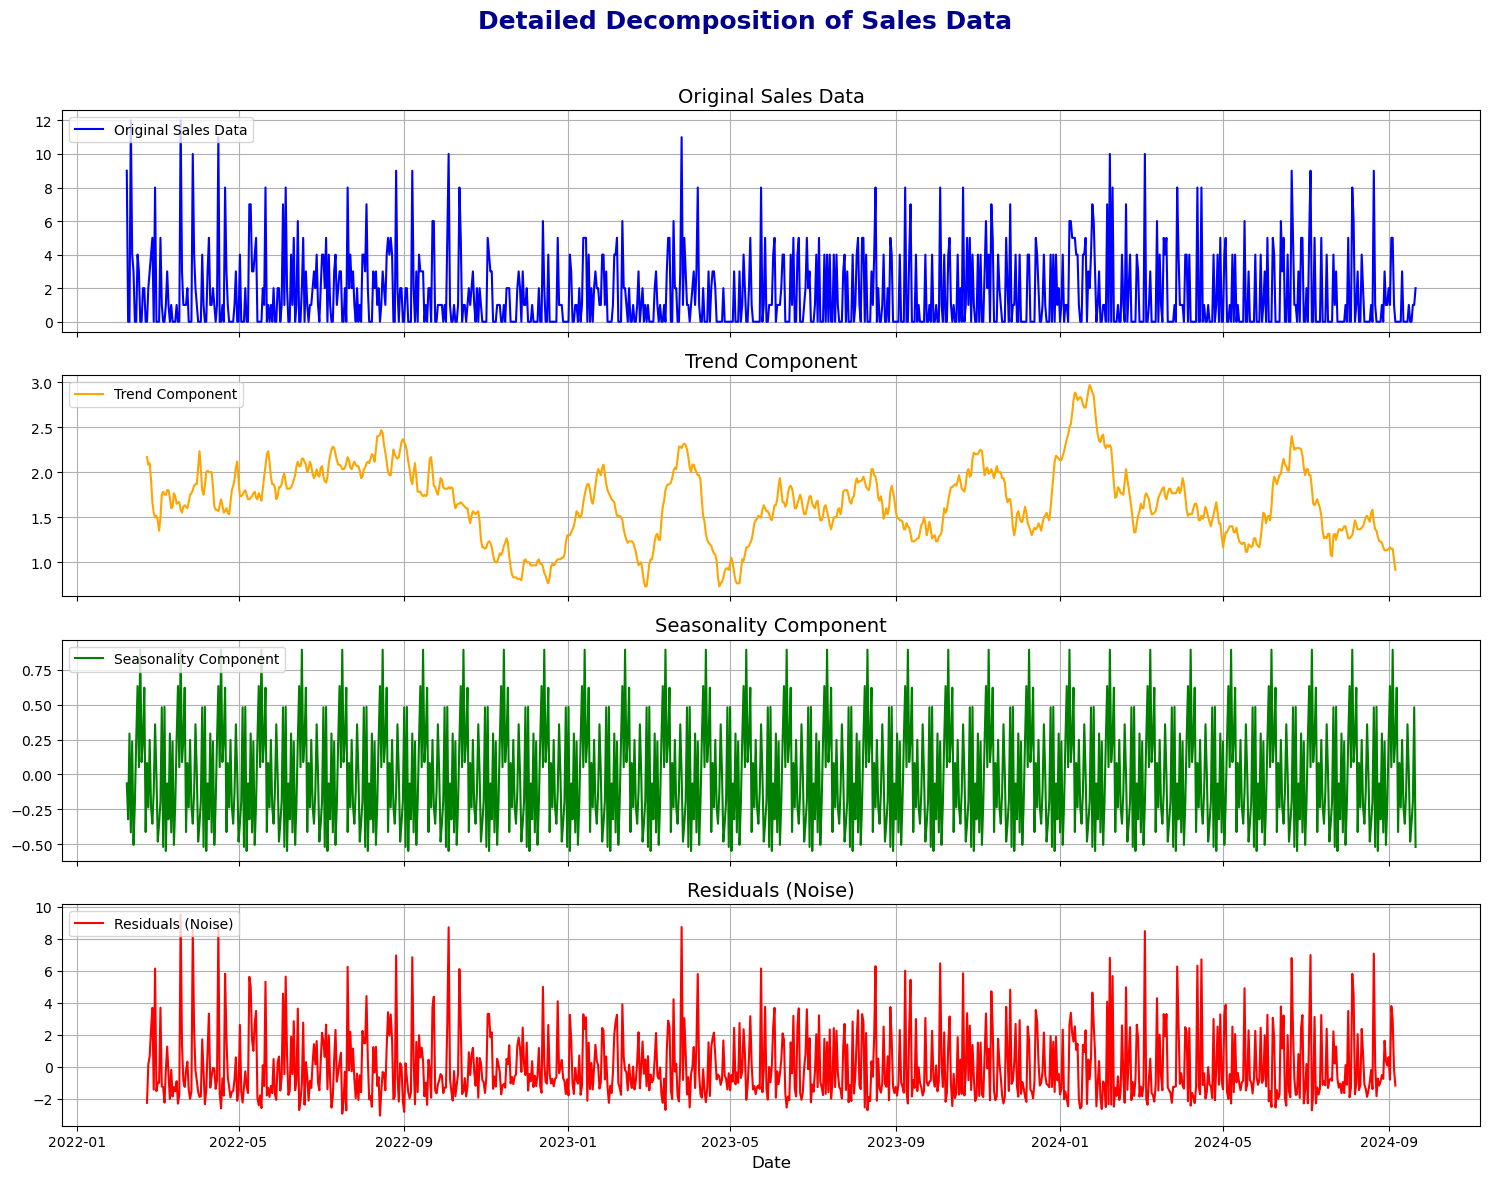

Decomposition completed with enhanced visualization.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
file_path = r"C:\Users\vimal\OneDrive\Documents\AI Assingments\Capstone\EDA\Cleaned_Data.xlsx"  # Replace with your file name
data = pd.read_excel(file_path)

# Aggregate sales by 'Date of Purchase' and sum the 'Count' column
aggregated_data = data.groupby('Date of Purchase')['Count'].sum().reset_index()

# Set the 'Date of Purchase' column as the index for time-series analysis
aggregated_data.set_index('Date of Purchase', inplace=True)

# Ensure the data is in proper time-series format
aggregated_data.index = pd.to_datetime(aggregated_data.index)

# Fill any missing dates with 0 sales (optional, depending on your data)
aggregated_data = aggregated_data.asfreq('D', fill_value=0)

# Decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(aggregated_data['Count'], model='additive', period=30)  # Adjust period as needed

# Plot the decomposed components with extra details
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Detailed Decomposition of Sales Data', fontsize=18, weight='bold', color='darkblue')

# Plot original data
axes[0].plot(aggregated_data.index, aggregated_data['Count'], label='Original Sales Data', color='blue')
axes[0].set_title('Original Sales Data', fontsize=14)
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot trend
axes[1].plot(result.trend, label='Trend Component', color='orange')
axes[1].set_title('Trend Component', fontsize=14)
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Plot seasonality
axes[2].plot(result.seasonal, label='Seasonality Component', color='green')
axes[2].set_title('Seasonality Component', fontsize=14)
axes[2].legend(loc='upper left')
axes[2].grid(True)

# Plot residuals
axes[3].plot(result.resid, label='Residuals (Noise)', color='red')
axes[3].set_title('Residuals (Noise)', fontsize=14)
axes[3].legend(loc='upper left')
axes[3].grid(True)

# Add x-axis label for shared axis
axes[3].set_xlabel('Date', fontsize=12)

# Tight layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
plt.show()

# Display message
print("Decomposition completed with enhanced visualization.")


1. Autocorrelation Function (ACF) Plot for Residuals

<Figure size 1200x600 with 0 Axes>

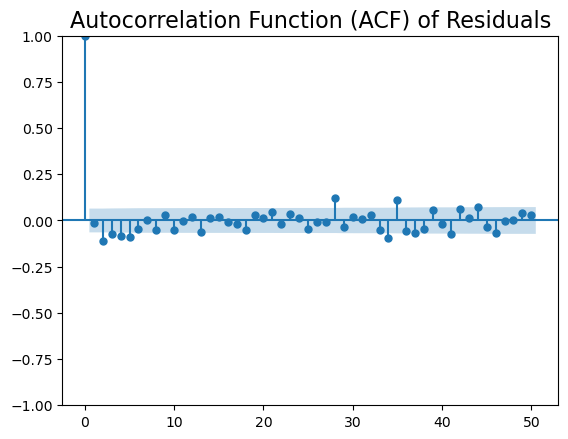

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = r"C:\Users\vimal\OneDrive\Documents\AI Assingments\Capstone\EDA\Cleaned_Data.xlsx"  # Replace with your file name
data = pd.read_excel(file_path)

# Aggregate sales by 'Date of Purchase' and sum the 'Count' column
aggregated_data = data.groupby('Date of Purchase')['Count'].sum().reset_index()

# Set the 'Date of Purchase' column as the index for time-series analysis
aggregated_data.set_index('Date of Purchase', inplace=True)

# Ensure the data is in proper time-series format
aggregated_data.index = pd.to_datetime(aggregated_data.index)

# Fill any missing dates with 0 sales (optional, depending on your data)
aggregated_data = aggregated_data.asfreq('D', fill_value=0)

# Decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(aggregated_data['Count'], model='additive', period=30)

# Plot residuals (noise) component
residuals = result.resid

# Plot the ACF of residuals to check for autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(residuals.dropna(), lags=50)  # Drop NA values before plotting
plt.title("Autocorrelation Function (ACF) of Residuals", fontsize=16)
plt.show()



                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  958
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2135.057
Date:                Fri, 22 Nov 2024   AIC                           4276.114
Time:                        21:15:11   BIC                           4290.705
Sample:                    02-07-2022   HQIC                          4281.671
                         - 09-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0224      0.034      0.666      0.506      -0.044       0.088
ma.L1         -0.9935      0.005   -203.604      0.000      -1.003      -0.984
sigma2         5.0511      0.175     28.906      0.0

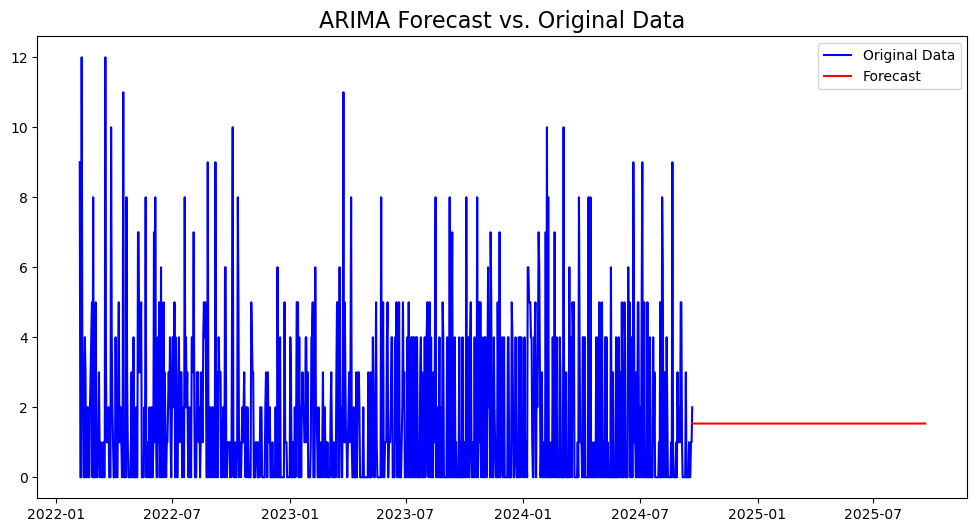

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (using p, d, q as placeholders; you can tune these parameters based on ACF analysis)
# p = lag order (number of past observations used for prediction)
# d = degree of differencing (how many times the data is differenced)
# q = size of moving average window (error terms)

# Example: ARIMA(1, 1, 1) - this can be fine-tuned based on your ACF and PACF analysis
model = ARIMA(aggregated_data['Count'], order=(1, 1, 1))  # Tune the order based on ACF results
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=365)  # Forecast for the next 30 days (can adjust)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data.index, aggregated_data['Count'], label='Original Data', color='blue')
plt.plot(pd.date_range(aggregated_data.index[-1], periods=365, freq='D'), forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs. Original Data", fontsize=16)
plt.legend()
plt.show()


to Build an LSTM Model


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 0.0296 - val_loss: 0.0194
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0191 - val_loss: 0.0188
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0171 - val_loss: 0.0194
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0187 - val_loss: 0.0177
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0189 - val_loss: 0.0180
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0166 - val_loss: 0.0177
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0177 - val_loss: 0.0188
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0178 - val_loss: 0.0183
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0151 - val_loss: 0.0172
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0181 - val_loss: 0.0175
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0167 - val_loss: 0.0174
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.

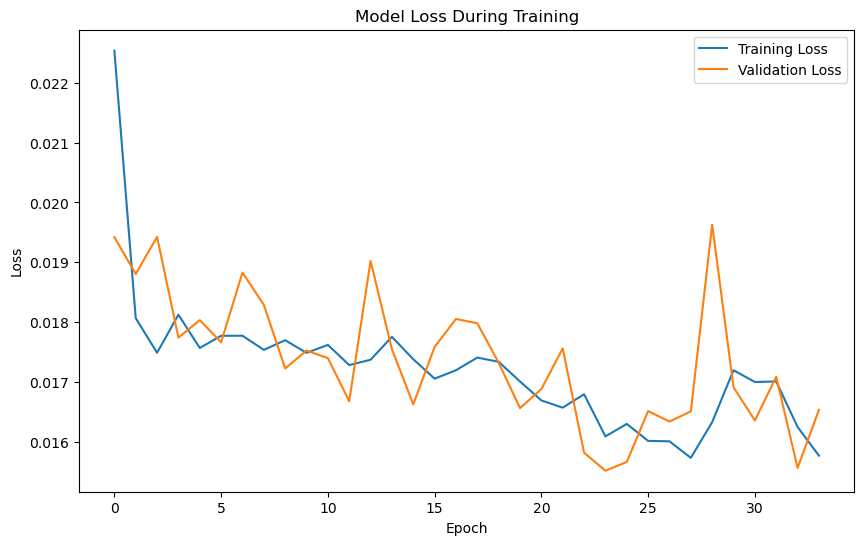

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


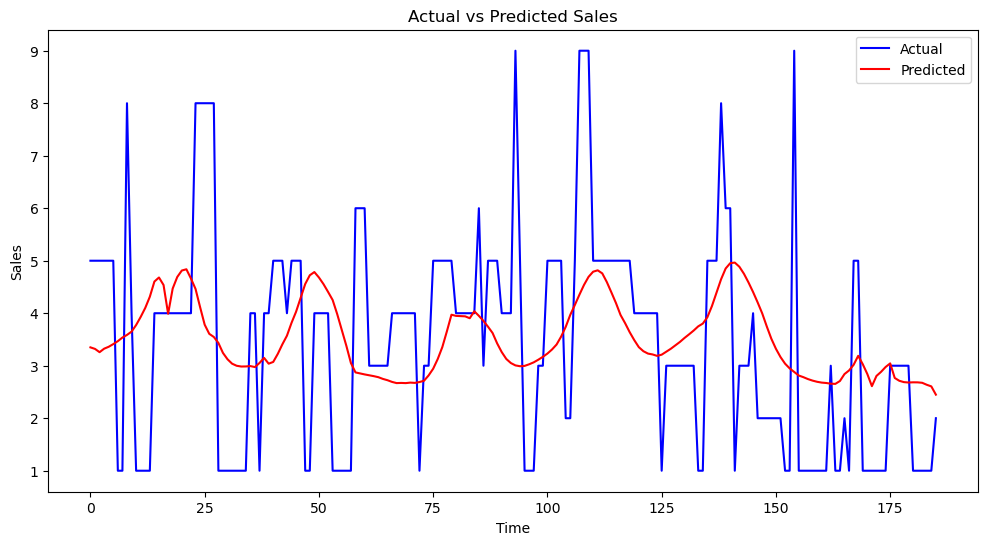

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

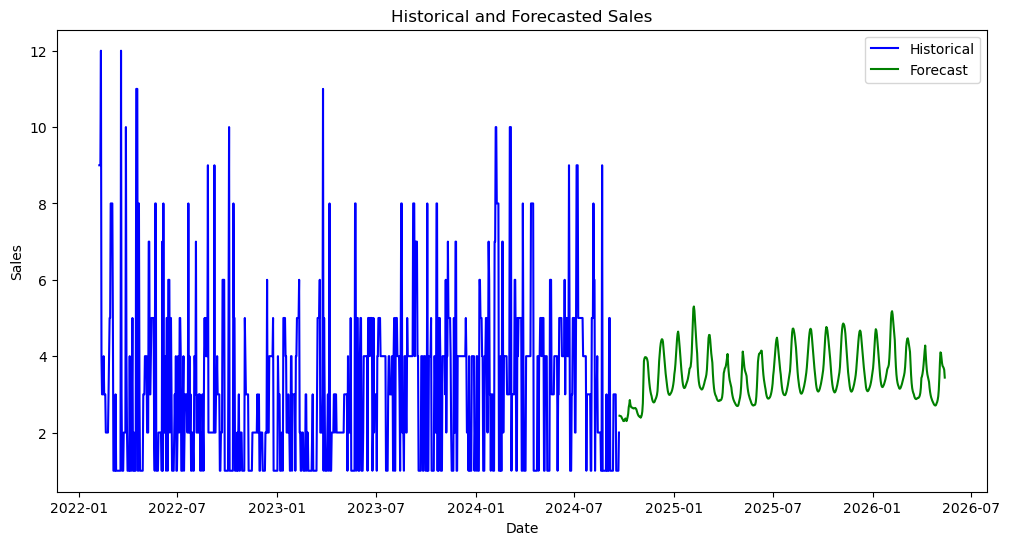

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input

# Load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    
    # Aggregate sales by date
    aggregated_data = data.groupby('Date of Purchase')['Count'].sum().reset_index()
    aggregated_data['Date of Purchase'] = pd.to_datetime(aggregated_data['Date of Purchase'])
    aggregated_data = aggregated_data.sort_values('Date of Purchase')
    aggregated_data.set_index('Date of Purchase', inplace=True)
    
    # Fill missing dates with forward fill then backward fill
    aggregated_data = aggregated_data.asfreq('D')
    # Using newer pandas methods instead of deprecated fillna(method=)
    aggregated_data['Count'] = aggregated_data['Count'].ffill().bfill()
    
    # Add time-based features
    aggregated_data['day_of_week'] = aggregated_data.index.dayofweek
    aggregated_data['month'] = aggregated_data.index.month
    aggregated_data['day_of_month'] = aggregated_data.index.day
    
    return aggregated_data

# Create sequences with multiple features
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length, 0])  # Only predict the Count column
    return np.array(X), np.array(y)

# Build enhanced LSTM model
def build_model(sequence_length, n_features):
    model = Sequential()
    
    # Add Input layer explicitly
    model.add(Input(shape=(sequence_length, n_features)))
    
    # LSTM layers
    model.add(LSTM(100, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='huber')
    return model

# Main execution
def train_and_predict(file_path, sequence_length=30, future_steps=600):
    # Load and preprocess data
    data = load_and_preprocess_data(file_path)
    
    # Scale all features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    # Create sequences with all features
    X, y = create_sequences(scaled_data, sequence_length)
    
    # Split data
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Build and train model
    model = build_model(sequence_length, X.shape[2])
    
    # Add callbacks for better training
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')  # Changed to .keras extension
    ]
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Make predictions
    predicted = model.predict(X_test)
    
    # Prepare for inverse transform
    pred_copies = np.repeat(predicted, scaled_data.shape[1], axis=1)
    pred_rescaled = scaler.inverse_transform(pred_copies)[:, 0]
    
    y_test_copies = np.repeat(y_test.reshape(-1, 1), scaled_data.shape[1], axis=1)
    y_test_rescaled = scaler.inverse_transform(y_test_copies)[:, 0]
    
    # Plot test predictions
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled, label='Actual', color='blue')
    plt.plot(pred_rescaled, label='Predicted', color='red')
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    
    # Future predictions
    last_sequence = scaled_data[-sequence_length:]
    future_predictions = []
    
    for _ in range(future_steps):
        next_pred = model.predict(last_sequence.reshape(1, sequence_length, -1))
        
        # Create a full feature set for the next prediction
        next_date = data.index[-1] + pd.Timedelta(days=len(future_predictions) + 1)
        next_features = np.zeros((1, scaled_data.shape[1]))
        next_features[0, 0] = next_pred[0, 0]  # Sales prediction
        next_features[0, 1] = next_date.dayofweek / 6  # Normalized day of week
        next_features[0, 2] = next_date.month / 12  # Normalized month
        next_features[0, 3] = next_date.day / 31  # Normalized day of month
        
        future_predictions.append(next_features[0])
        last_sequence = np.vstack([last_sequence[1:], next_features])
    
    # Rescale predictions
    future_predictions = np.array(future_predictions)
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)[:, 0]
    
    # Plot historical and future predictions
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Count'], label='Historical', color='blue')
    future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_steps)
    plt.plot(future_dates, future_predictions_rescaled, label='Forecast', color='green')
    plt.title('Historical and Forecasted Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    
    return model, history, future_predictions_rescaled

# Example usage
file_path = r"C:\Users\vimal\OneDrive\Documents\AI Assingments\Capstone\EDA\Cleaned_Data.xlsx"
model, history, predictions = train_and_predict(file_path)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0259 - val_loss: 0.0204
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0178 - val_loss: 0.0192
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0179 - val_loss: 0.0182
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0172 - val_loss: 0.0170
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0186 - val_loss: 0.0194
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0188 - val_loss: 0.0198
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0205 - val_loss: 0.0178
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0157 - val_loss: 0.0188
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0182 - val_loss: 0.0166
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0180 - val_loss: 0.0175
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0179 - val_loss: 0.0180
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.

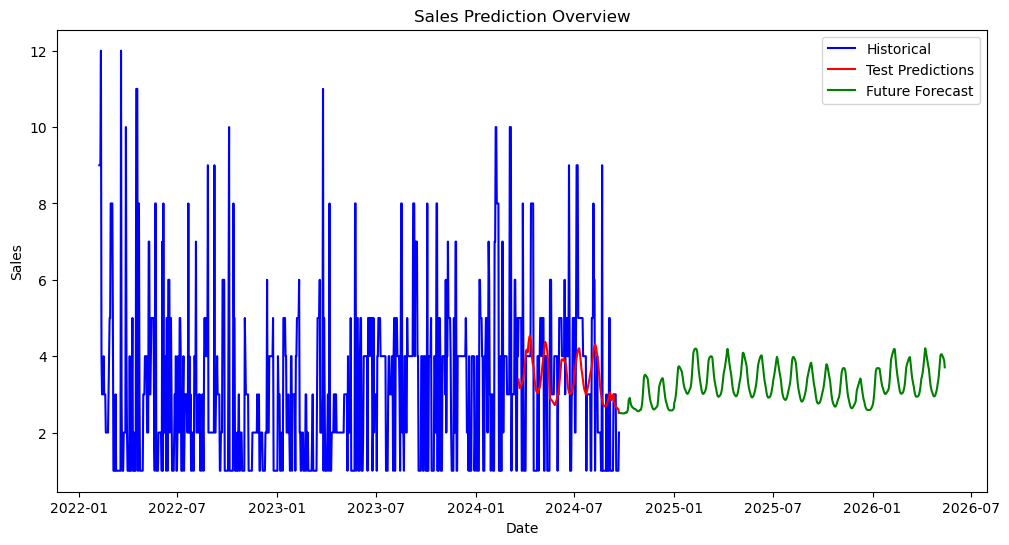


Test Predictions (first few rows):
        Date  Actual  Predicted
0 2024-03-20     5.0   3.392186
1 2024-03-21     5.0   3.271579
2 2024-03-22     5.0   3.161415
3 2024-03-23     5.0   3.181862
4 2024-03-24     5.0   3.190468

Future Predictions (first few rows):
        Date  Predicted
0 2024-09-22   2.511321
1 2024-09-23   2.509894
2 2024-09-24   2.509232
3 2024-09-25   2.508424
4 2024-09-26   2.505420

Model Performance Metrics:
Mean Absolute Error: 1.55
Root Mean Squared Error: 1.94
R² Score: 0.111


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# [Previous functions remain the same until train_and_predict]

def train_and_predict(file_path, sequence_length=30, future_steps=600):
    # Load and preprocess data
    data = load_and_preprocess_data(file_path)
    
    # Scale all features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    # Create sequences with all features
    X, y = create_sequences(scaled_data, sequence_length)
    
    # Split data
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Build and train model
    model = build_model(sequence_length, X.shape[2])
    
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
    ]
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=1
    )
    
    # Make predictions on test data
    predicted = model.predict(X_test)
    
    # Prepare for inverse transform
    pred_copies = np.repeat(predicted, scaled_data.shape[1], axis=1)
    pred_rescaled = scaler.inverse_transform(pred_copies)[:, 0]
    
    y_test_copies = np.repeat(y_test.reshape(-1, 1), scaled_data.shape[1], axis=1)
    y_test_rescaled = scaler.inverse_transform(y_test_copies)[:, 0]
    
    # Create test predictions DataFrame
    test_dates = data.index[sequence_length + train_size:sequence_length + len(y_test) + train_size]
    test_predictions_df = pd.DataFrame({
        'Date': test_dates,
        'Actual': y_test_rescaled,
        'Predicted': pred_rescaled
    })
    
    # Future predictions
    last_sequence = scaled_data[-sequence_length:]
    future_predictions = []
    
    for _ in range(future_steps):
        next_pred = model.predict(last_sequence.reshape(1, sequence_length, -1))
        
        next_date = data.index[-1] + pd.Timedelta(days=len(future_predictions) + 1)
        next_features = np.zeros((1, scaled_data.shape[1]))
        next_features[0, 0] = next_pred[0, 0]
        next_features[0, 1] = next_date.dayofweek / 6
        next_features[0, 2] = next_date.month / 12
        next_features[0, 3] = next_date.day / 31
        
        future_predictions.append(next_features[0])
        last_sequence = np.vstack([last_sequence[1:], next_features])
    
    # Rescale future predictions
    future_predictions = np.array(future_predictions)
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)[:, 0]
    
    # Create future predictions DataFrame
    future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_steps)
    future_predictions_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted': future_predictions_rescaled
    })
    
    # Save predictions to Excel
    with pd.ExcelWriter('sales_predictions.xlsx') as writer:
        # Save historical data
        data.to_excel(writer, sheet_name='Historical_Data')
        
        # Save test predictions
        test_predictions_df.to_excel(writer, sheet_name='Test_Predictions', index=False)
        
        # Save future predictions
        future_predictions_df.to_excel(writer, sheet_name='Future_Predictions', index=False)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Count'], label='Historical', color='blue')
    plt.plot(test_predictions_df['Date'], test_predictions_df['Predicted'], 
             label='Test Predictions', color='red')
    plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted'], 
             label='Future Forecast', color='green')
    plt.title('Sales Prediction Overview')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    
    return model, history, test_predictions_df, future_predictions_df

# Run the model and get predictions
file_path = r"C:\Users\vimal\OneDrive\Documents\AI Assingments\Capstone\EDA\Cleaned_Data.xlsx"
model, history, test_predictions, future_predictions = train_and_predict(file_path)

# Display first few rows of test predictions
print("\nTest Predictions (first few rows):")
print(test_predictions.head())

print("\nFuture Predictions (first few rows):")
print(future_predictions.head())

# Calculate error metrics for test predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_predictions['Actual'], test_predictions['Predicted'])
rmse = np.sqrt(mean_squared_error(test_predictions['Actual'], test_predictions['Predicted']))
r2 = r2_score(test_predictions['Actual'], test_predictions['Predicted'])

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")